# Descriptive Statistics with Python


#### Measures of Central tendency
#### Measures of Dispersion

## Table of Contents


```py
list1 = [20, 35, 30]
list2 = [10 25,55]
list3 = [5, 10, 75]
```

### 1. Measures of central tendency 
Is a single value that represent the center point of a dataset. This value can also be referred to as `the central location` of a dataset.

#### Mean 
- The mean represent the average value of the dataset.
- The most common measure of central tendency is the mean.
- The mean can be used for both continuous and discrete numeric data.
##### When to use Mean?
- When the distribution of data is symmertrical and there are no outliers.
- Distribution is Symmetrical

**Symmertrical**
<img src="Photos/Symmertrical Distribution.png." alt="Control Structure" width="70%" style="display: block; margin: 0 auto;">

[Details](https://www.abs.gov.au/statistics/understanding-statistics/statistical-terms-and-concepts/measures-central-tendency#:~:text=There%20are%20three%20main%20measures,central%20value%20in%20the%20distribution.)
##### Limitations of the mean

    The mean cannot be calculated for `categorical data`, as the values cannot be summed.

    As the mean includes every value in the distribution the mean is influenced by outliers and skewed distributions.

#### Median 
- Median is the number which divides the dataset into two equal halves.
##### When to use Median?
- The median is less affected by outliers and **skewed** data than the mean and is usually the preferred measure of central tendency when the distribution is not symmetrical. 

**Skewed Distribution**

<img src="Photos/Skewed distribution.png" alt="Control Structure" width="75%" style="display: block; margin: 0 auto;">

##### Limitation of the median
The median cannot be identified for categorical nominal data, as it cannot be logically ordered.


#### Mode 
The mode is the most coommly occurring value in a distribution.
###### Advantage of the mode
The mode has an advantage over the median and the mean as it can be found for both numerical and categorical (non-numerical) data.


### 2. Measures Of Dispersion
let we describe the spread of our dataset, or the amount of variation in your data values. 

```py
list1 = [20, 35, 30]
list2 = [10 25,55]
list3 = [5, 10, 75]
```

#### Range
The **range** is the difference between the largest and smallest value in a dataset. 

#### Variance 
The average of the spuared difference of each data point from the mean.
#### Standard Deviation
Measures how spread out your values are from the mean of your dataset.

    - Low, or small, standard deviation indicates data are clustered tightly around the mean, and high, or large, standard deviation indicates data are more spread out.
<img src="Photos/photo_2023-11-11_10-46-48.jpg" alt="Control Structure" width="75%" style="display: block; margin: 0 auto;">

**Exercise:** 
```py
data = [56, 65, 74, 75, 76, 77, 80, 81, 91]
```
- Find Mean 
- Find Sum of Square (x-mean of population)
- Find Population

### 3. Measures of Position 



**Measures of Position**  let you determine the position of a value in relation to other values in a dataset.
<img src="Photos/Three-Quartiles-Four-Quarters.png" alt="Control Structure" width="75%" style="display: block; margin: 0 auto;">

#### Boxplot

#### Using visualizations


<img src="Photos/Box-Plot-and-Whisker-Plot-1.png" alt="Control Structure" width="75%" style="display: block; margin: 0 auto;">

[Deials](https://www.scribbr.com/statistics/outliers/)

### Outlier
Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.



In [1]:
def outlier_detection(df):
    """
    Detect potential outliers in a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing numerical data.

    Returns:
    - pandas.Series: A Series containing potential outlier values.
    
    The function calculates the first quartile (Q1), third quartile (Q3), and the Interquartile Range (IQR).
    It then identifies potential outliers below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR).
    The result is a Series containing the values in the DataFrame that are potential outliers.

    Example:
    >>> data = {'Column1': [2, 4, 5, 7, 8, 9, 10, 11, 12, 50]}
    >>> df = pd.DataFrame(data)
    >>> outlier_detection(df['Column1'])
    Returns:
    9    50
    Name: Column1, dtype: int64
    """
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    upper_end = Q3 + 1.5 * IQR
    lower_end = Q1 - 1.5 * IQR
    outliers = df[(df > upper_end) | (df < lower_end)]
    return outliers


In [2]:
def filter_by_substring(df, column_name, substring, case = True):
    """
    Filter DataFrame rows based on a substring match in a specific column.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame.
    - column_name (str): The name of the column to check for the substring.
    - substring (str): The substring to search for in the specified column.

    Returns:
    - pandas.DataFrame: A DataFrame containing rows where the specified substring is found in the specified column.
    """
    return df[df[column_name].str.contains(substring, case=case)]

In [3]:
def boxplot(data, column_name):
    """
    Create a box plot for a specified column in a DataFrame.

    Parameters:
    - data (pandas.DataFrame): The input DataFrame.
    - column_name (str): The name of the column for which to create the box plot.

    Returns:
    - None

    This function uses Matplotlib and Seaborn to generate a box plot for the specified column.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column_name])

    # Add labels and a title
    plt.xlabel('Data')
    plt.ylabel('Values')
    plt.title(f'Box Plot for {column_name}')
    plt.grid(True)
    plt.show()

In [4]:
def get_missing_features(data):
    """
    Get the features (columns) in a DataFrame that have missing values.

    Parameters:
    - data (pandas.DataFrame): The input DataFrame.

    Returns:
    - list: A list of feature names with missing values.
    """
    missing_features = data.columns[data.isnull().any()].tolist()
    return missing_features

In [5]:
def get_cat_features(df):
    """
    Identify categorical features in a Pandas DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame to analyze.

    Returns:
    - List[str]: A list of column names containing categorical features.

    Example:
    >>> import pandas as pd
    >>> data = {'Name': ['Alice', 'Bob', 'Charlie'],
    ...         'Age': [25, 30, 22],
    ...         'Gender': ['Female', 'Male', 'Male']}
    >>> df = pd.DataFrame(data)
    >>> categorical_columns = check_cat_features(df)
    >>> print(categorical_columns)
    ['Name', 'Gender']
    """
    cat_features = []
    for col in df.columns:
        if df[col].dtype == 'O':
            cat_features.append(col)
    return cat_features


In [6]:
get_cat_features(df)

NameError: name 'df' is not defined

In [ ]:
df

In [7]:
def getnum_features(df, cat_features):
    """
    Identify numerical features in a Pandas DataFrame by excluding categorical features.

    Parameters:
    - df (pd.DataFrame): The input DataFrame to analyze.
    - cat_features (list): A list of column names containing categorical features.

    Returns:
    - List[str]: A list of column names containing numerical features.

    Example:
    >>> import pandas as pd
    >>> data = {'Name': ['Alice', 'Bob', 'Charlie'],
    ...         'Age': [25, 30, 22],
    ...         'Gender': ['Female', 'Male', 'Male']}
    >>> df = pd.DataFrame(data)
    >>> cat_columns = ['Name', 'Gender']
    >>> numerical_columns = get_num_features(df, cat_columns)
    >>> print(numerical_columns)
    ['Age']
    """
    num_features = [col for col in df.columns if col not in cat_features]
    return num_features


### About dataset
This dataset represents a list of school districts in an anonymous country. The data includes district and state names, total population, and the literacy rate.

The dataset contains:

680 rows – each row is a different school district

| Column Name | Type   | Description                                                |
|-------------|--------|------------------------------------------------------------|
| DISTNAME    | str    | The names of an anonymous country’s school districts      |
| STATNAME    | str    | The names of an anonymous country’s states                 |
| BLOCKS      | int64  | The number of blocks in the school district. Blocks are the smallest organizational structure in the education system of the anonymous country.                |
| VILLAGES    | int64  | The number of villages in each district                    |
| CLUSTERS    | int64  | The number of clusters in the school district              |
| TOTPOPULAT  | float64  | The population for each district                           |
| OVERALL_LI  | float64  | The literacy rate for each district                        |

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
df = pd.read_csv('education_districtwise.csv')

In [10]:
df.head()

,DISTNAME,STATNAME,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,OVERALL_LI
0,DISTRICT32,STATE1,13,391,104,875564.0,66.92
1,DISTRICT649,STATE1,18,678,144,1015503.0,66.93
2,DISTRICT229,STATE1,8,94,65,1269751.0,71.21
3,DISTRICT259,STATE1,13,523,104,735753.0,57.98
4,DISTRICT486,STATE1,8,359,64,570060.0,65.00


In [11]:
import Data_cleaning as clean

In [12]:
clean.outlier_detection(df.VILLAGES)

156    2603
193    2618
350    3142
352    3175
354    3042
360    3803
361    3963
362    3430
370    2573
395    3238
407    2460
Name: VILLAGES, dtype: int64

In [13]:
df.columns

Index(['DISTNAME', 'STATNAME', 'BLOCKS', 'VILLAGES', 'CLUSTERS', 'TOTPOPULAT',
       'OVERALL_LI'],
      dtype='object')

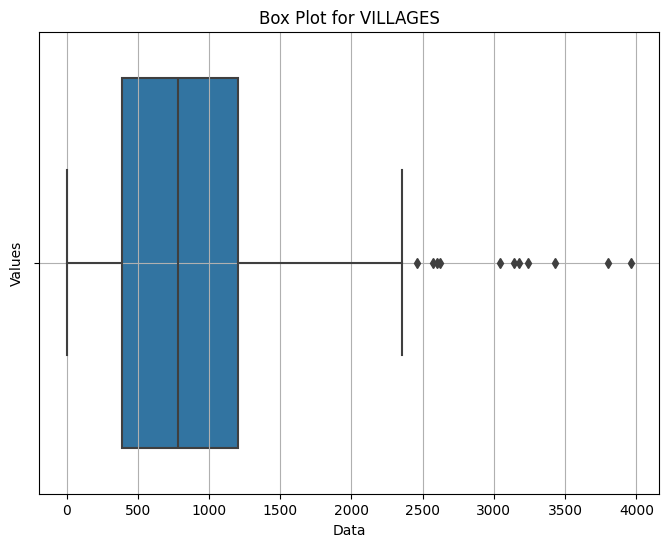

In [14]:
boxplot(df, 'VILLAGES')

In [15]:
import seaborn as sns


In [20]:
df['VILLAGES'].describe()

count     680.000000
mean      874.614706
std       622.711657
min         6.000000
25%       390.750000
50%       785.500000
75%      1204.250000
max      3963.000000
Name: VILLAGES, dtype: float64

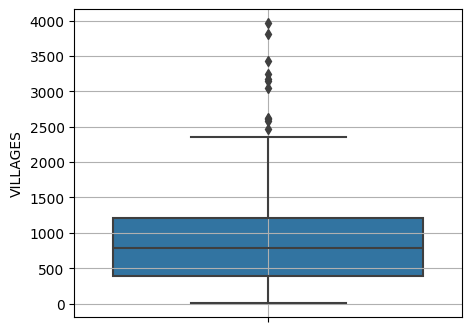

In [26]:
fig, ax = plt.subplots(figsize = (5, 4))
sns.boxplot(data = df,y = df['VILLAGES'] )
# plt.yscale('log')
plt.grid()
plt.show()

In [33]:
brankA = [10, 60, 50, 30, 40, 20]
brankB = [35, 45, 30, 35,40, 25]

In [34]:
df = pd.DataFrame({'brankA':brankA,
     'brankB':brankB})
df

,brankA,brankB
0,10,35
1,60,45
2,50,30
3,30,35
4,40,40
5,20,25


In [35]:
df['brankA'].mean()

35.0

In [36]:
df['brankB'].mean()

35.0

In [45]:
df['brankA-Mean'] = (df['brankA']-df['brankA'].mean())**2

In [46]:
df

,brankA,brankB,brankA-Mean
0,10,35,625.0
1,60,45,625.0
2,50,30,225.0
3,30,35,25.0
4,40,40,25.0
5,20,25,225.0


In [63]:
(sum(df['brankA-Mean'])/6)**(1/2)

17.07825127659933

In [61]:
df['brankA'].std(ddof = 0)

17.07825127659933

In [62]:
df.describe()

,brankA,brankB,brankA-Mean
count,6.000000,6.000000,6.000000
mean,35.000000,35.000000,291.666667
std,18.708287,7.071068,273.252020
min,10.000000,25.000000,25.000000
25%,22.500000,31.250000,75.000000
50%,35.000000,35.000000,225.000000
75%,47.500000,38.750000,525.000000
max,60.000000,45.000000,625.000000


In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.columns

#### Missing_value

In [ ]:
get_missing_features(df)

In [ ]:
df[df[['TOTPOPULAT','OVERALL_LI']].isnull().any(axis = 1)]

In [ ]:
df.drop(columns=)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

## Duplicated

In [ ]:
df.duplicated().sum()

## Outlier

### About dataset
This dataset represents a list of school districts in an anonymous country. The data includes district and state names, total population, and the literacy rate.

The dataset contains:

680 rows – each row is a different school district

| Column Name | Type   | Description                                                |
|-------------|--------|------------------------------------------------------------|
| DISTNAME    | str    | The names of an anonymous country’s school districts      |
| STATNAME    | str    | The names of an anonymous country’s states                 |
| BLOCKS      | int64  | The number of blocks in the school district. Blocks are the smallest organizational structure in the education system of the anonymous country.                |
| VILLAGES    | int64  | The number of villages in each district                    |
| CLUSTERS    | int64  | The number of clusters in the school district              |
| TOTPOPULAT  | float64  | The population for each district                           |
| OVERALL_LI  | float64  | The literacy rate for each district                        |

In [ ]:
df.describe()

In [ ]:
df[df['BLOCKS']>=20]

In [ ]:
df['BLOCKS'].value_counts()

In [ ]:
outlier_detection

In [ ]:
block_outlier = outlier_detection(df.BLOCKS)

In [ ]:
block_outlier.index

In [ ]:
df.drop(index=block_outlier.index, inplace=True)

In [ ]:
clean.outlier_detection(df.BLOCKS)

In [ ]:
clean.outlier_detection(df.VILLAGES)

In [ ]:
df['VILLAGES'].describe()

In [ ]:
df['VILLAGES'].sort_values(ascending= False).head(20)

In [ ]:
df.loc[block_outlier.index]

In [ ]:
clean.outlier_detection(df.CLUSTERS)

In [ ]:
df['CLUSTERS'].describe()